<a href="https://colab.research.google.com/github/CharviAggarwal02/InLighn-Tech/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Credit Card Fraud Detection**
**Industry**: Finance

**Description:** Develop a system to detect fraudulent credit card transactions in real-time using
transaction data.

**Instructions:**
1. Load the dataset and explore features like transaction amount, time, and anonymized
variables.
2. Handle class imbalance (fraud cases are rare) using techniques like SMOTE or
undersampling.
3. Train a model (e.g., Logistic Regression, XGBoost, or Autoencoder) to classify
transactions as fraud or legitimate.
4. Evaluate using ROC-AUC and confusion matrix.
5. Simulate real-time detection with a subset of test data.

**Dataset:** Credit Card Fraud Detection Dataset (Kaggle)
**Tools:** Python, Scikit-learn, Imbalanced-learn, TensorFlow

In [ ]:
import numpy as np
import pandas as pd  #importing libraries

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))       #to allow write along with read in /kaggle/input

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from datetime import datetime

In [ ]:
df=pd.read_csv("/content/creditcard.csv")
print(df)

      Time        V1        V2        V3        V4        V5        V6  \
0        0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2        1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3        1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4        2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...    ...       ...       ...       ...       ...       ...       ...   
1981  1524 -0.340622  1.132232  1.291494  0.062313  0.016387 -0.977070   
1982  1525 -1.842696  1.740641  0.861526 -0.856315 -0.655376 -0.842786   
1983  1525 -0.480693  0.646091  1.577264 -0.084411 -0.305958 -0.534739   
1984  1525 -0.342132  1.091125  1.282729  0.068076 -0.022498 -0.996727   
1985  1526 -0.854343  1.382948  1.278665  2.914727 -0.183139 -0.349329   

            V7        V8        V9  ...       V21       V22       V23  \
0     0.239599  0.098698  0.363787  ..

**EDA(Exploratory Data Analysis) on Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1986 non-null   int64  
 1   V1      1986 non-null   float64
 2   V2      1986 non-null   float64
 3   V3      1986 non-null   float64
 4   V4      1986 non-null   float64
 5   V5      1986 non-null   float64
 6   V6      1986 non-null   float64
 7   V7      1986 non-null   float64
 8   V8      1986 non-null   float64
 9   V9      1986 non-null   float64
 10  V10     1986 non-null   float64
 11  V11     1986 non-null   float64
 12  V12     1986 non-null   float64
 13  V13     1986 non-null   float64
 14  V14     1985 non-null   float64
 15  V15     1985 non-null   float64
 16  V16     1985 non-null   float64
 17  V17     1985 non-null   float64
 18  V18     1985 non-null   float64
 19  V19     1985 non-null   float64
 20  V20     1985 non-null   float64
 21  V21     1985 non-null   float64
 22  

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,...,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000
mean,761.035750,-0.284195,0.266886,0.848005,0.151216,-0.077457,0.050205,0.138347,-0.058795,0.012145,...,-0.011611,-0.144319,-0.043045,0.013864,0.108372,0.049408,0.027197,-0.002018,68.602469,0.001008
std,451.034025,1.353508,1.142026,1.012645,1.264932,1.272512,1.274204,1.140750,0.966493,0.900828,...,0.653200,0.588201,0.352890,0.601370,0.407874,0.454251,0.369485,0.272864,241.677019,0.031734
min,0.000000,-11.140706,-12.114213,-12.389545,-4.657545,-32.092129,-3.498447,-4.925568,-12.258158,-3.110515,...,-4.709977,-2.776923,-4.020300,-2.162523,-1.577384,-1.243924,-5.336289,-2.738566,0.000000,0.000000
25%,366.000000,-1.045512,-0.204111,0.280517,-0.670513,-0.576269,-0.691393,-0.286991,-0.172322,-0.479310,...,-0.226941,-0.547474,-0.181176,-0.350802,-0.151028,-0.281097,-0.049467,-0.021053,4.950000,0.000000
50%,750.000000,-0.437621,0.314294,0.864505,0.190698,-0.154843,-0.198063,0.117535,0.037598,-0.034097,...,-0.087329,-0.152603,-0.057041,0.093137,0.131713,0.036992,0.023011,0.022722,15.090000,0.000000
75%,1161.000000,1.095047,0.926126,1.486942,1.002546,0.376901,0.389714,0.569262,0.279513,0.449706,...,0.083530,0.252698,0.064859,0.428755,0.383339,0.303731,0.140481,0.090920,63.650000,0.000000
max,1526.000000,1.685314,6.118940,4.017561,6.013346,7.672544,21.393069,34.303177,3.877662,6.450992,...,6.765928,1.957759,4.095021,1.215279,1.629684,3.463246,3.852046,4.157934,7712.430000,1.000000


In [ ]:
df['Class'].value_counts(normalize=True)

,proportion
Class,
0.0,0.998992
1.0,0.001008


The data is very imbalanced with only 0.1727% of the transactions is fraud (meaning under 500 out of 284807 transactions)

In [ ]:
dup = df[df.duplicated(keep=False)] #check for duplicacy

In [ ]:
dup['Class'].value_counts(normalize=False)

,count
Class,
0.0,24


In [ ]:
fraud = df.loc[df['Class'] == 1]
non_fraud = df.loc[df['Class'] == 0]

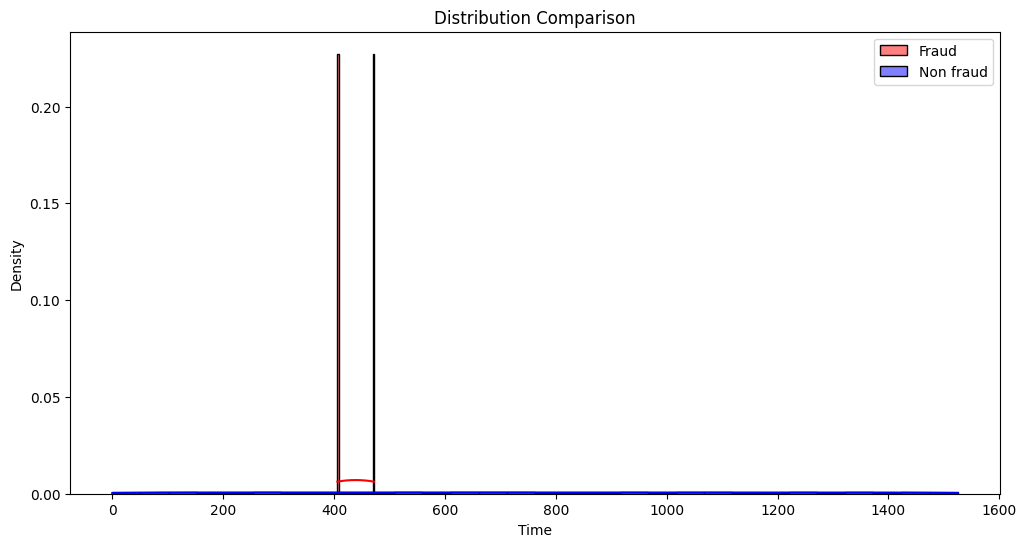

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(fraud['Time'], color='red', label='Fraud', kde=True, stat="density", bins=30)
sns.histplot(non_fraud['Time'], color='blue', label='Non fraud', kde=True, stat="density", bins=30)
plt.xlabel('Time')
plt.ylabel('Density')
plt.title('Distribution Comparison')
plt.legend()
plt.show()

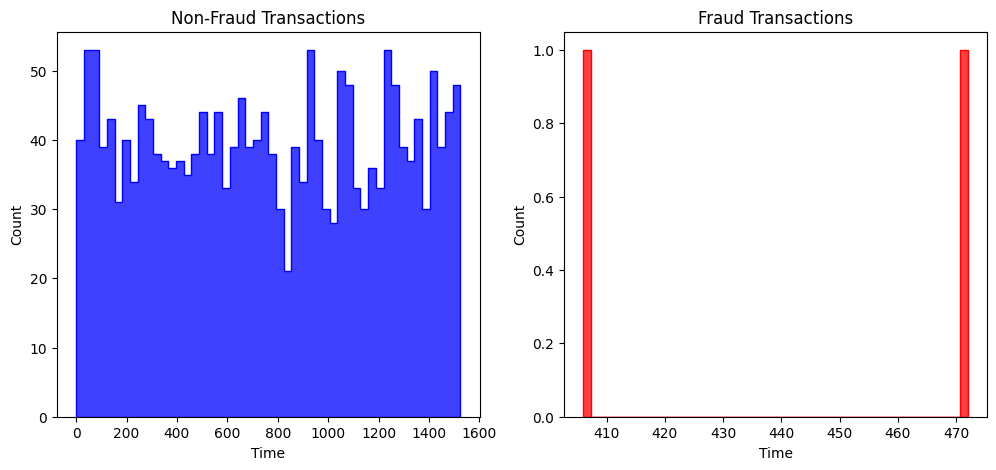

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=non_fraud, x='Time', bins=50, ax=axes[0], color = 'blue', element='step')
axes[0].set_title('Non-Fraud Transactions')

sns.histplot(data=fraud, x='Time', bins=50, ax=axes[1], color = 'red', element='step')
axes[1].set_title('Fraud Transactions')

plt.show()

Text(0.5, 1.0, 'Amount vs Fraud/Non-Fraud')

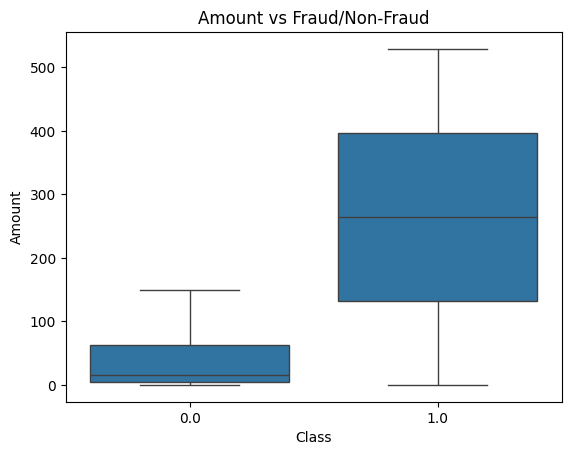

In [ ]:
sns.boxplot(x='Class', y='Amount', data=df, showfliers=False)
plt.title('Amount vs Fraud/Non-Fraud')

In [ ]:
print(f"Overall Average: {df['Amount'].mean()}")
print(f"Fraud Average: {fraud['Amount'].mean()}")
print(f"Non-Fraud Average: {non_fraud['Amount'].mean()}")

Overall Average: 68.60246851385392
Fraud Average: 264.5
Non-Fraud Average: 68.40489157841655


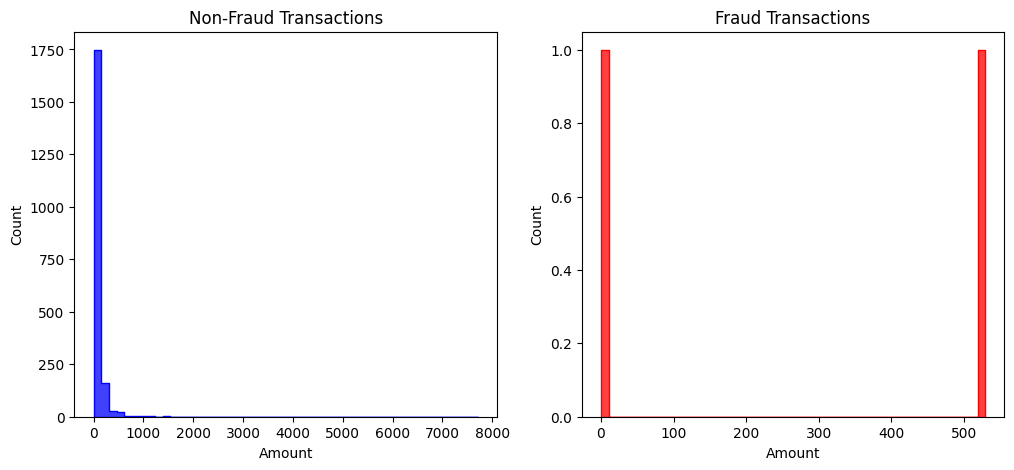

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=non_fraud, x='Amount', bins=50, ax=axes[0], color = 'blue', element='step')
axes[0].set_title('Non-Fraud Transactions')

sns.histplot(data=fraud, x='Amount', bins=50, ax=axes[1], color = 'red', element='step')
axes[1].set_title('Fraud Transactions')

plt.show()

<Axes: >

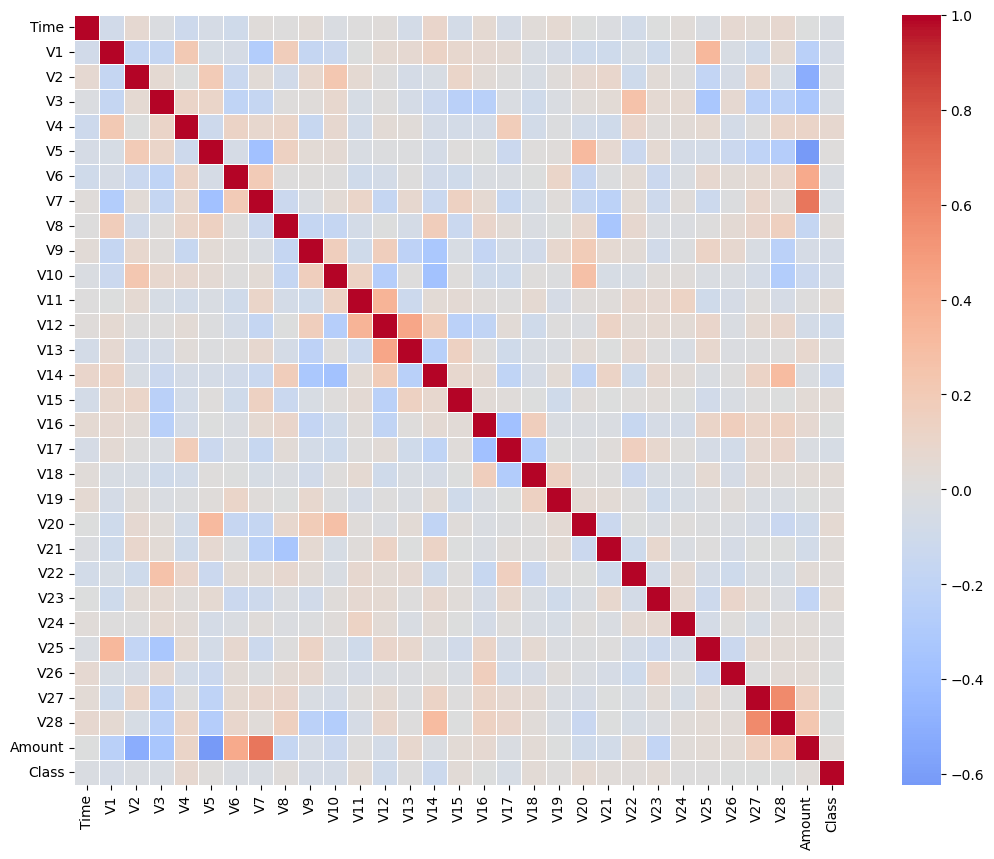

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap='coolwarm', vmax=1.0, center=0, square=True, linewidths=.5)

**Feature Engineering & Model Prediction**

In [ ]:
new_df = df.copy()

In [ ]:
scaler = MinMaxScaler()
new_df['Time'] = scaler.fit_transform(new_df[['Time']])
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,0.000655,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,0.000655,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,0.001311,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,0.998689,-0.340622,1.132232,1.291494,0.062313,0.016387,-0.977070,0.723755,-0.074630,-0.396655,...,-0.262948,-0.688785,-0.010937,0.334061,-0.160025,0.071779,0.245128,0.098336,5.35,0.0
1982,0.999345,-1.842696,1.740641,0.861526,-0.856315,-0.655376,-0.842786,0.198563,0.602764,0.455595,...,-0.213609,-0.400617,0.030013,0.512611,-0.077087,0.286218,0.586012,0.352610,1.00,0.0
1983,0.999345,-0.480693,0.646091,1.577264,-0.084411,-0.305958,-0.534739,0.860346,-0.028569,-0.800705,...,0.121681,0.175190,0.035986,0.557665,-0.112301,0.337154,-0.015602,0.051504,80.70,0.0
1984,0.999345,-0.342132,1.091125,1.282729,0.068076,-0.022498,-0.996727,0.676304,-0.042250,-0.312036,...,-0.269850,-0.734148,-0.007354,0.319161,-0.179146,0.073683,0.241932,0.097139,3.59,0.0


In [ ]:
train, temp = train_test_split(new_df, test_size=0.3, random_state=1)
val, test = train_test_split(temp, test_size=0.5, random_state=1)

In [ ]:
train['Class'].value_counts(), test['Class'].value_counts(), val['Class'].value_counts()


(Class
 0.0    1388
 1.0       1
 Name: count, dtype: int64,
 Class
 0.0    298
 Name: count, dtype: int64,
 Class
 0.0    297
 1.0      1
 Name: count, dtype: int64)

In [ ]:
x_train, y_train = train.iloc[:, :-1], train.iloc[:, -1]
x_test, y_test = test.iloc[:, :-1], test.iloc[:, -1]
x_val, y_val = val.iloc[:, :-1], val.iloc[:, -1]